<a href="https://colab.research.google.com/github/karayim3/Lab6/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# graph a histogram with the inelastic trial that has 25 runs
# we did 25 runs for when m1 > m2
# first import the data for this trial only

import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving lab6inelastic.csv to lab6inelastic.csv
User uploaded file "lab6inelastic.csv" with length 313 bytes


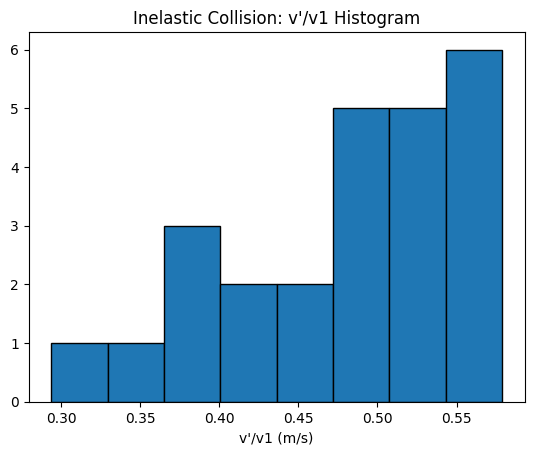

The average value is 0.4795304480929601 m/s
The standard deviation is 0.07781103580114708
There are 7 data point(s) that are within 1 standard deviation from the mean (between 0.401719412291813 and 0.5573414838941072).
This is 7/25 of the data, or 28.00%
There are 1 data point(s) that are within 2 standard deviations from the mean (between 0.32390837649066595 and 0.6351525196952542).
This is 1/25 of the data, or 4.00%


In [60]:
# m1 = 0.4538kg. M = 0.7579kg.
# since we only need v_before and v_after, i shortened the data file so that we only have the data we need
v_before, v_after = np.loadtxt('lab6inelastic.csv', skiprows=1, unpack=True, delimiter=',')
after_over_before = v_after / v_before  # v'/v1 for each run (prints as list)
after_over_before = after_over_before.tolist() #tolist() converts numpy.float64 type to float

plt.hist(after_over_before, bins=8, edgecolor='black', linewidth=1.0) #bin size 8 has data in each bin but it is not too small where there is only 1 data in each
plt.title("Inelastic Collision: v'/v1 Histogram")
plt.xlabel("v'/v1 (m/s)")
plt.show()

# calculate avg and standard deviation
# avg = sum of data divided by number of data
avg = sum(after_over_before) / len(after_over_before)
print("The average value is", avg, "m/s")

# standard deviation is how far is each data from the mean. sqrt(sum((x_i - mean)^2)/N-1)
# first start with finding the differences from the mean for each data
differences = []
for quotient in after_over_before:
  difference = quotient - avg
  differences.append(difference)

sd_part1 = []
sd_part2 = []
standard_dev = []
for difference in differences:
  sd_part1.append(difference**2)
sd_part2 = sum(sd_part1)
standard_dev = np.sqrt(sd_part2 / (len(sd_part1)-1))
print("The standard deviation is", standard_dev)

# range is mean +- 1 standard deviation
min = avg - standard_dev
max = avg + standard_dev
# make for loop to see if each data point is outside this range
count1 = 0
for number in after_over_before:
  if number > min and number < max:
    # it is in the range, so continue to next data point
    continue
  else:
    count1 += 1
print(f"There are {count1} data point(s) that are within 1 standard deviation from the mean (between {min} and {max}).")
percent1 = (count1 / len(after_over_before)) * 100
print(f"This is {count1}/{len(after_over_before)} of the data, or {percent1:.2f}%")

# range for mean +- 2 standard deviations
min2 = avg - (2 * standard_dev)
max2 = avg + (2 * standard_dev)
count2 = 0
for number in after_over_before:
  if number > min2 and number < max2:
    # it is in the range, so continue to next data point
    continue
  else:
    count2 += 1
print(f"There are {count2} data point(s) that are within 2 standard deviations from the mean (between {min2} and {max2}).")
percent2 = (count2 / len(after_over_before)) * 100
print(f"This is {count2}/{len(after_over_before)} of the data, or {percent2:.2f}%")

# New Section